170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 68s 42ms/step - loss: 1.4217 - accuracy: 0.4932 - val_loss: 1.1236 - val_accuracy: 0.6085
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0602 - accuracy: 0.6293 - val_loss: 0.9868 - val_accuracy: 0.6602
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9116 - accuracy: 0.6817 - val_loss: 0.9174 - val_accuracy: 0.6821
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8101 - accuracy: 0.7157 - val_loss: 0.9389 - val_accuracy: 0.6767
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7256 - accuracy: 0.7457 - val_loss: 0.8679 - val_accuracy: 0.7060
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6504 - accuracy: 0.7733 - val_loss: 0.8795 - val_accuracy: 0.7045
Epoch 7/10
1563/1563 [==============================] - 6

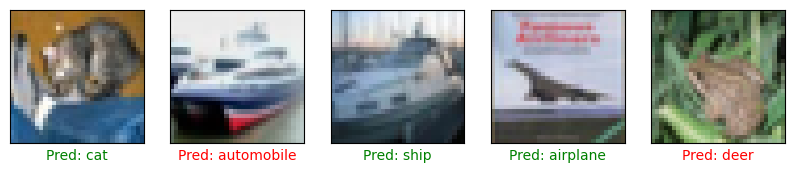

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a list of class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)), ```
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 10 epochs
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Predict labels for test set
predictions = model.predict(x_test)

# Show some test images with their predicted labels
num_images = 5  # Number of images to display
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.grid(False)  # Hide gridlines
    plt.imshow(x_test[i])  # Show test image

    # Get predicted label for the image
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i][0]

    # Set color to green for correct prediction, red for incorrect prediction
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f'Pred: {class_names[predicted_label]}', color=color)  # Display predicted label
plt.show()